# 1. Explanatory Data Analysis

1.1 Import Library dan Dataset

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1.2 Melihat informasi umum dataset

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


1.3 Melihat statistik deskriptif

In [103]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1.4 Periksa missing value

In [104]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.5 Visualisasi distribusi variabel numerik

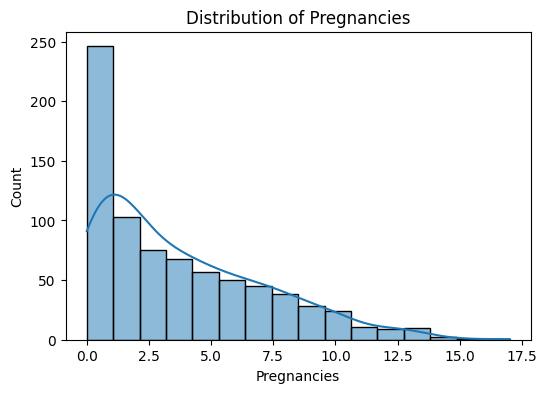

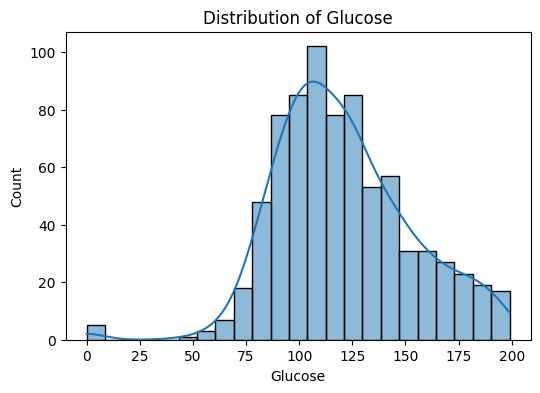

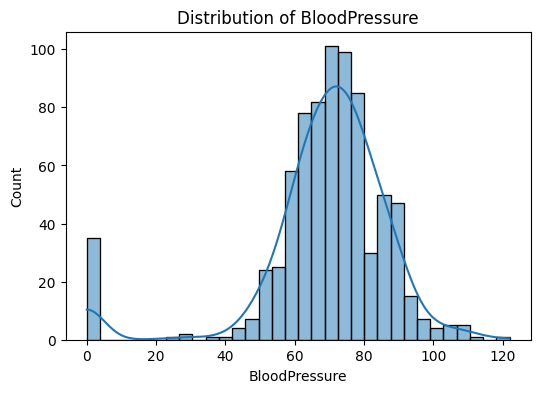

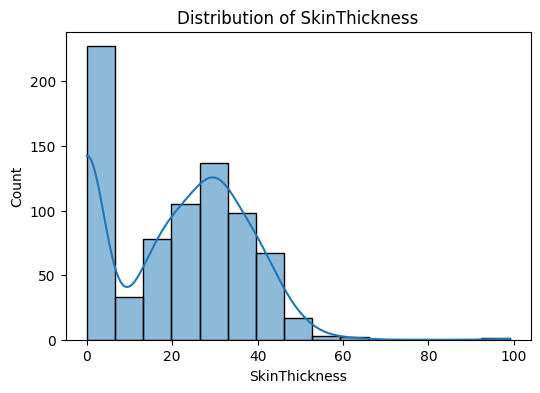

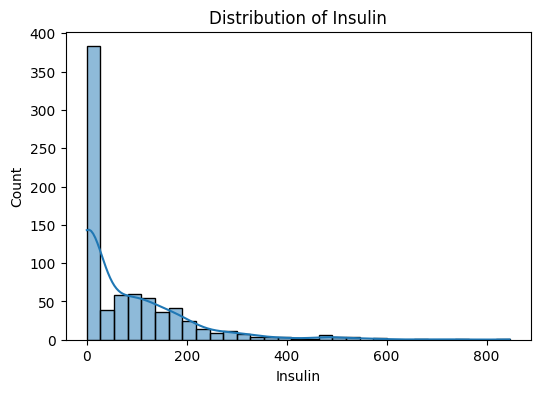

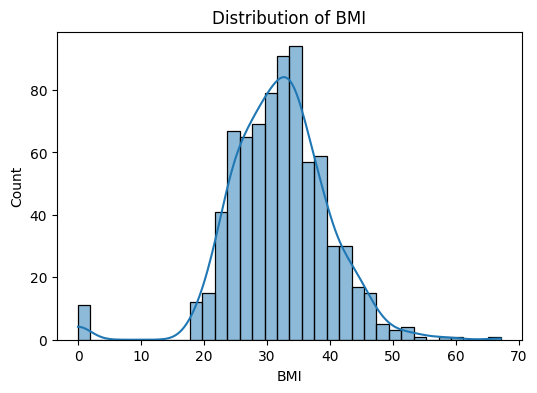

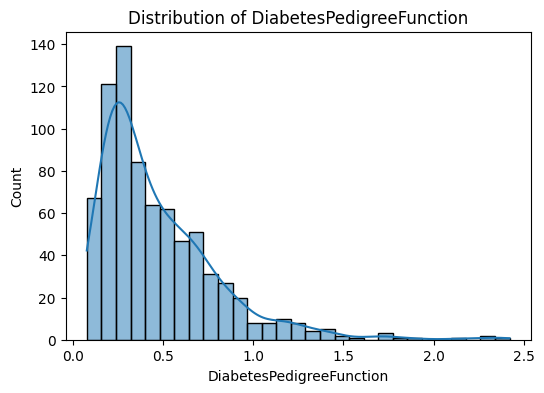

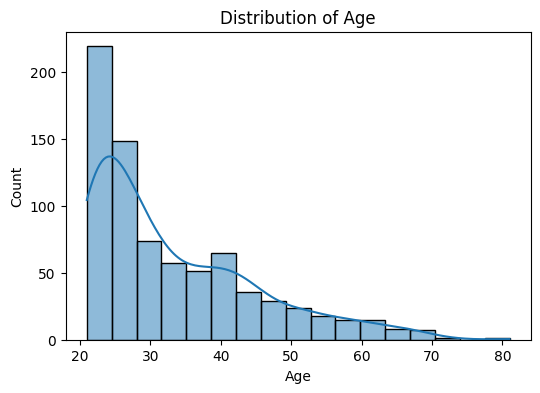

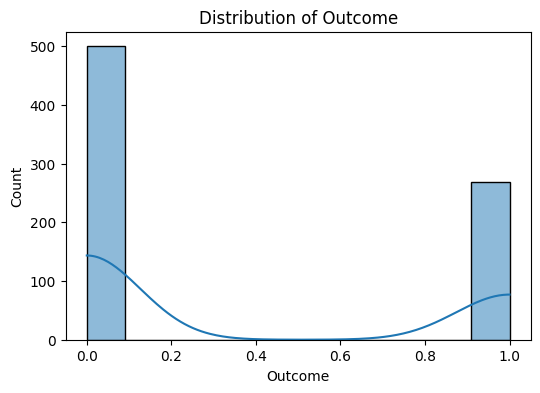

In [105]:
for column in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

1.6 Lihat Distribusi Kelas

In [106]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


# 2. Pre-Processing

2.1 Mengatasi Data yang Outliers

Data sebelum outlier dihapus: (768, 9)


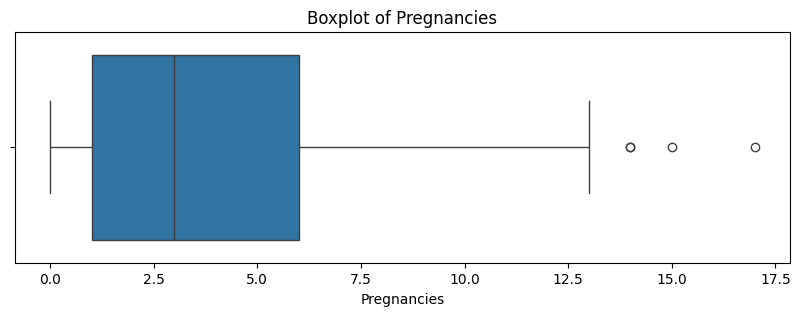

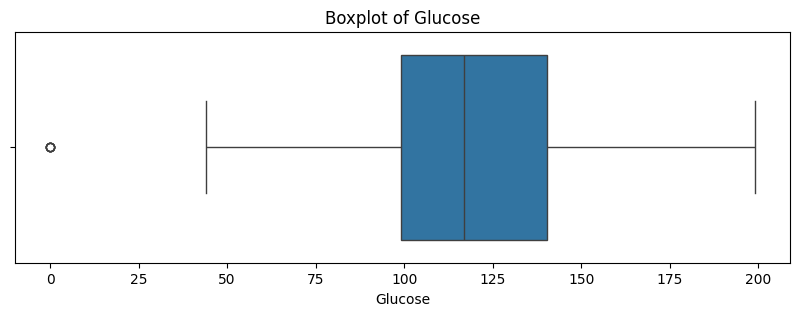

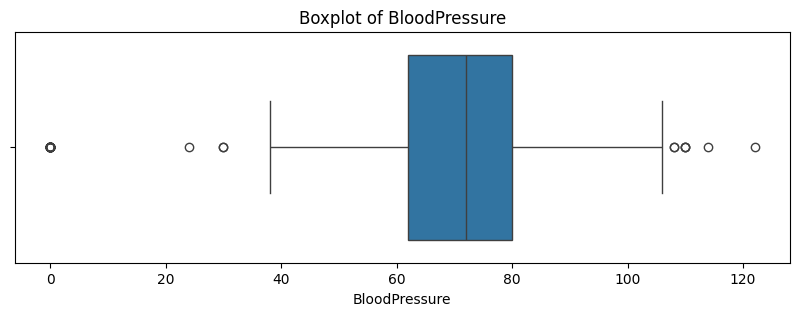

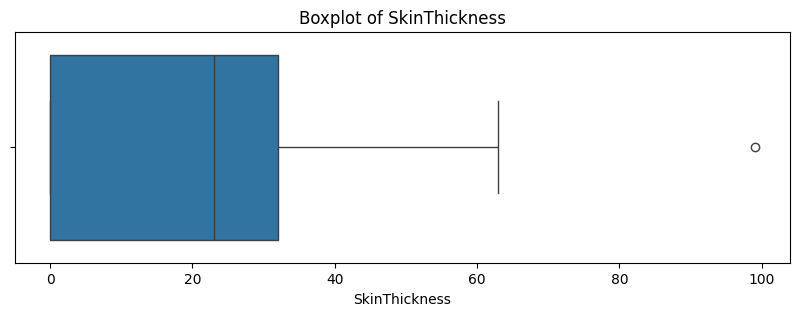

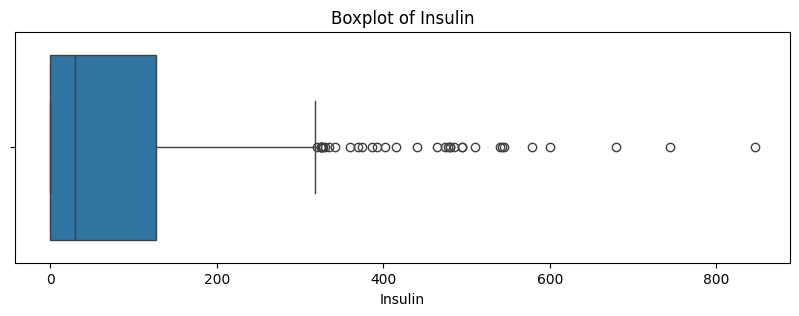

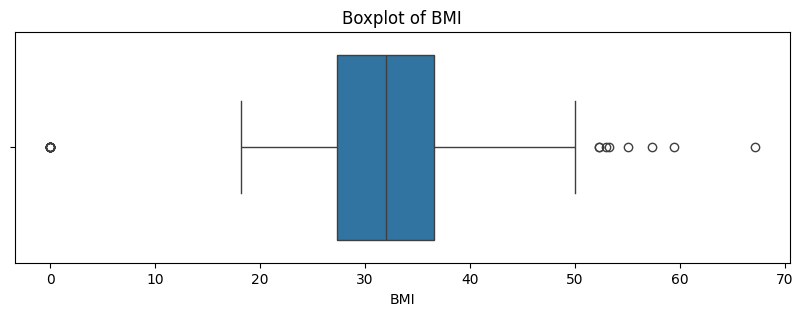

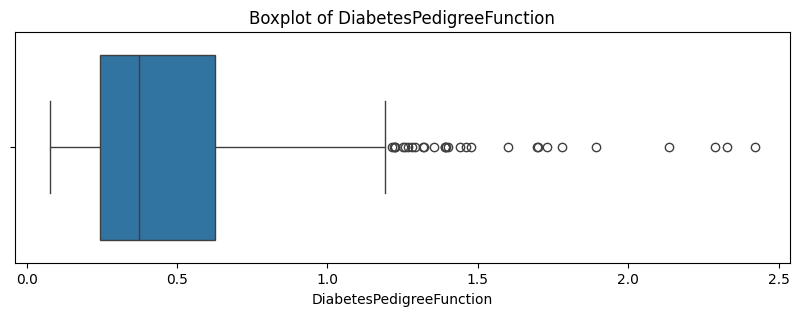

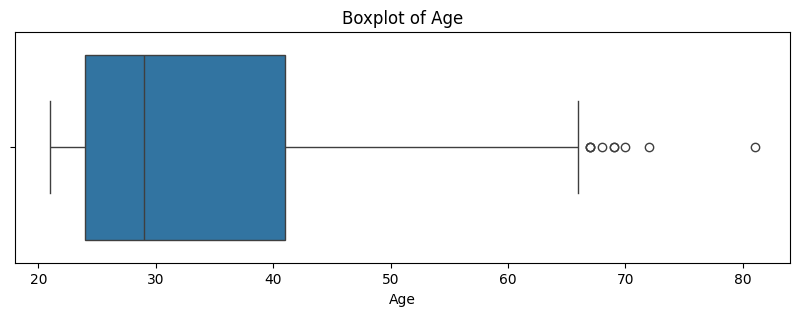

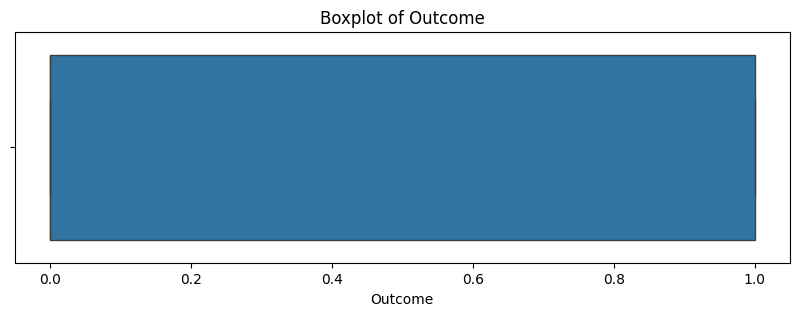

In [107]:
print(f'Data sebelum outlier dihapus: {data.shape}')
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [108]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [109]:
data = remove_outliers(data)
print(f'Data setelah outlier dihapus: {data.shape}')

Data setelah outlier dihapus: (636, 9)


2.2 Mengatasi data yang missing value

In [110]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Feature Engineering

3.1 Handling Imbalance Data

In [111]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

print(f"Distribusi kelas sebelum undersampling: {len(y)}")
undersampler = RandomUnderSampler(random_state=42)
X, y = undersampler.fit_resample(X, y)
print(f"Distribusi kelas setelah undersampling: {len(y)}")

Distribusi kelas sebelum undersampling: 636
Distribusi kelas setelah undersampling: 394


3.2 Normalisasi

In [112]:
print('Fitur sebelum dilakukan normalisasi')
display(X)

Fitur sebelum dilakukan normalisasi


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
477,7,114,76,17,110,23.8,0.466,31
141,5,106,82,30,0,39.5,0.286,38
607,1,92,62,25,41,19.5,0.482,25
465,0,124,56,13,105,21.8,0.452,21
570,3,78,70,0,0,32.5,0.270,39
...,...,...,...,...,...,...,...,...
754,8,154,78,32,0,32.4,0.443,45
755,1,128,88,39,110,36.5,1.057,37
757,0,123,72,0,0,36.3,0.258,52
761,9,170,74,31,0,44.0,0.403,43


In [113]:
scaler = MinMaxScaler()
X  = scaler.fit_transform(X)

In [114]:
print('Fitur setelah dilakukan normalisasi')
display(X)

Fitur setelah dilakukan normalisasi


array([[0.53846154, 0.40425532, 0.51612903, ..., 0.17834395, 0.35892692,
        0.22727273],
       [0.38461538, 0.34751773, 0.61290323, ..., 0.67834395, 0.19241443,
        0.38636364],
       [0.07692308, 0.24822695, 0.29032258, ..., 0.04140127, 0.37372803,
        0.09090909],
       ...,
       [0.        , 0.46808511, 0.4516129 , ..., 0.57643312, 0.16651249,
        0.70454545],
       [0.69230769, 0.80141844, 0.48387097, ..., 0.82165605, 0.30064755,
        0.5       ],
       [0.07692308, 0.4893617 , 0.25806452, ..., 0.37898089, 0.2506938 ,
        0.59090909]])

# 4. Training Model

4.1 Memisahkan data latih dan data uji

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f'Dimensi pada data latih {X_train.shape}')
print(f'Dimensi pada data uji {X_test.shape}')

Dimensi pada data latih (315, 8)
Dimensi pada data uji (79, 8)


4.2 Train model menggunakan seluruh algoritma klasifikasi

In [116]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}


In [117]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[model_name] = {
        "Akurasi": accuracy,
        "AUC Score": auc_score,
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1 Score (Class 1)": report["1"]["f1-score"]
    }

results_df = pd.DataFrame(results).T
print("Hasil Evaluasi Model:")
print(results_df)


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Hasil Evaluasi Model:
                            Akurasi  AUC Score  Precision (Class 1)  \
Logistic Regression        0.734177   0.830128             0.695652   
K-Nearest Neighbors        0.696203   0.736538             0.674419   
Decision Tree              0.683544   0.683654             0.675000   
Random Forest              0.734177   0.807372             0.704545   
Gradient Boosting          0.746835   0.858974             0.693878   
AdaBoost                   0.670886   0.743590             0.638298   
Support Vector Classifier  0.721519   0.787179             0.688889   
Naive Bayes                0.772152   0.819872             0.744186   

                           Recall (Class 1)  F1 Score (Class 1)  
Logistic Regression                0.820513            0.752941  
K-Nearest Neighbors                0.743590            0.707317  
Decision Tree                      0.692308            0.683544  
Random Forest                      0.794872            0.746988  
Gradient

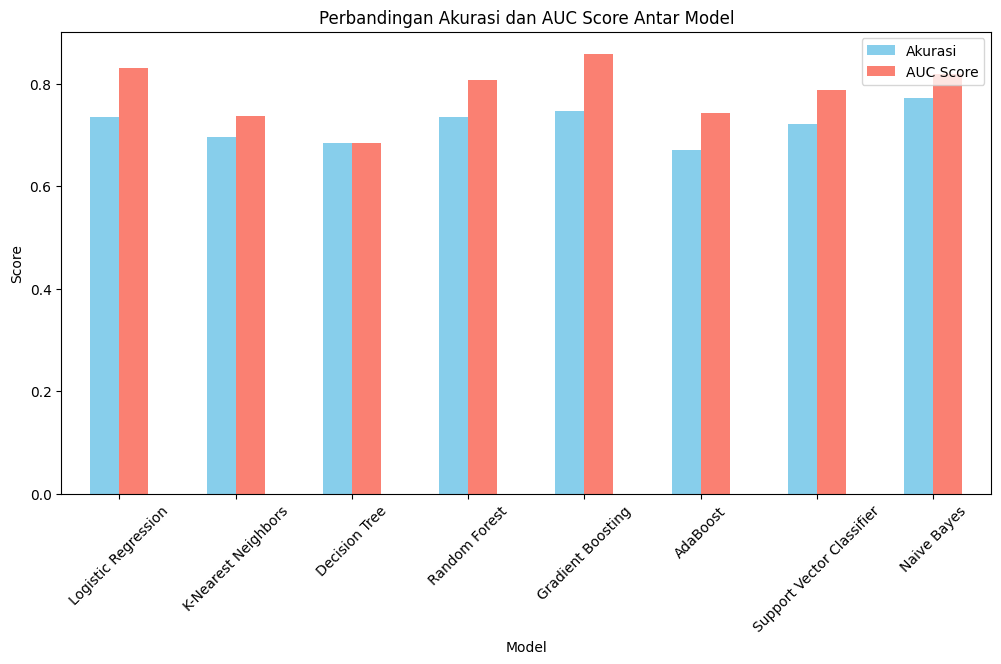

In [118]:
results_df[['Akurasi', 'AUC Score']].plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title("Perbandingan Akurasi dan AUC Score Antar Model")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(["Akurasi", "AUC Score"])
plt.xticks(rotation=45)
plt.show()


In [119]:
best_model = results_df.sort_values(by="F1 Score (Class 1)", ascending=False)
print("Model Terbaik Berdasarkan F1 Score untuk Class 1:")
print(best_model)


Model Terbaik Berdasarkan F1 Score untuk Class 1:
                            Akurasi  AUC Score  Precision (Class 1)  \
Naive Bayes                0.772152   0.819872             0.744186   
Gradient Boosting          0.746835   0.858974             0.693878   
Logistic Regression        0.734177   0.830128             0.695652   
Random Forest              0.734177   0.807372             0.704545   
Support Vector Classifier  0.721519   0.787179             0.688889   
K-Nearest Neighbors        0.696203   0.736538             0.674419   
AdaBoost                   0.670886   0.743590             0.638298   
Decision Tree              0.683544   0.683654             0.675000   

                           Recall (Class 1)  F1 Score (Class 1)  
Naive Bayes                        0.820513            0.780488  
Gradient Boosting                  0.871795            0.772727  
Logistic Regression                0.820513            0.752941  
Random Forest                      0.794872   

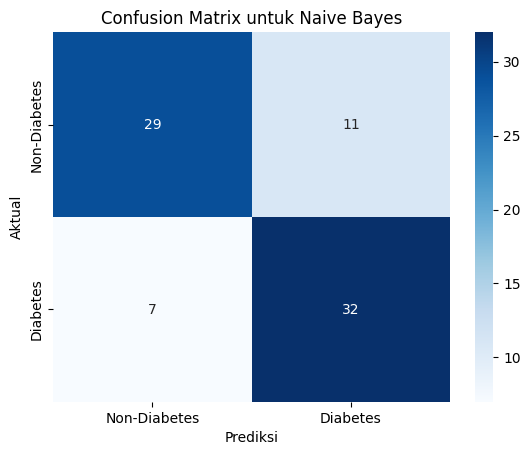

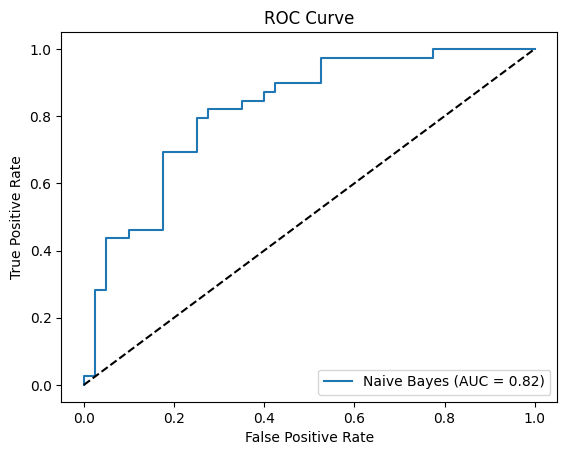

In [120]:
best_model_name = best_model.index[0]
best_clf = models[best_model_name]
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetes", "Diabetes"], yticklabels=["Non-Diabetes", "Diabetes"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title(f"Confusion Matrix untuk {best_model_name}")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()